<a href="https://colab.research.google.com/github/peter000815/BA0815/blob/master/DP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
array = np.array([(13.450126,144.757551),(19.587268,-155.426890),(38.760481,-92.561787),(47.375267,-109.638758),(47.620146,-100.540737),(34.955082,-97.268406),(44.647176,-100.348761),(38.475841,-80.840841),(44.430898,-89.688464),(43.170026,-107.568535)])

In [2]:
import time
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def DP_TSP(distances_array):
    n = len(distances_array)
    all_points_set = set(range(n))
    memo = {(tuple([i]), i): tuple([0, None]) for i in range(n)}
    queue = [(tuple([i]), i) for i in range(n)]

    while queue:
        prev_visited, prev_last_point = queue.pop(0)
        prev_dist, _ = memo[(prev_visited, prev_last_point)]

        to_visit = all_points_set.difference(set(prev_visited))
        for new_last_point in to_visit:
            new_visited = tuple(sorted(list(prev_visited) + [new_last_point]))
            new_dist = prev_dist + distances_array[prev_last_point][new_last_point]

            if (new_visited, new_last_point) not in memo:
                memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)
                queue += [(new_visited, new_last_point)]
            else:
                if new_dist < memo[(new_visited, new_last_point)][0]:
                    memo[(new_visited, new_last_point)] = (new_dist, prev_last_point)

    optimal_path, optimal_cost = retrace_optimal_path(memo, n)

    return optimal_path, optimal_cost

In [4]:
def retrace_optimal_path(memo: dict, n: int) -> [[int], float]:
    points_to_retrace = tuple(range(n))

    full_path_memo = dict((k, v) for k, v in memo.items() if k[0] == points_to_retrace)
    path_key = min(full_path_memo.keys(), key=lambda x: full_path_memo[x][0])

    last_point = path_key[1]
    optimal_cost, next_to_last_point = memo[path_key]

    optimal_path = [last_point]
    points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    while next_to_last_point is not None:
        last_point = next_to_last_point
        path_key = (points_to_retrace, last_point)
        _, next_to_last_point = memo[path_key]

        optimal_path = [last_point] + optimal_path
        points_to_retrace = tuple(sorted(set(points_to_retrace).difference({last_point})))

    return optimal_path, optimal_cost

In [5]:

def plot_route(X, optimal_path):
    for p1, p2 in zip(optimal_path[:-1], optimal_path[1:]):
        plt.plot([X[p1, 0], X[p2, 0]], [X[p1, 1], X[p2, 1]]);

In [6]:
def generate_input(ar_name):
    X = ar_name
    distances_array = np.array([[np.linalg.norm(X[i] - X[j])
                                for i in range(ar_name.shape[0])]
                              for j in range(ar_name.shape[0])])
    return X, distances_array

In [7]:
ar_name = array
X, distances_array = generate_input(ar_name)

t = time.time()
optimal_path, optimal_cost = DP_TSP(distances_array)
runtime = round(time.time() - t, 4)

print(f"Found optimal path in {runtime} seconds.") 
print(f"Optimal cost: {round(optimal_cost, 3)}, optimal path: {optimal_path}")

Found optimal path in 0.0611 seconds.
Optimal cost: 329.772, optimal path: [0, 7, 8, 2, 5, 6, 4, 9, 3, 1]


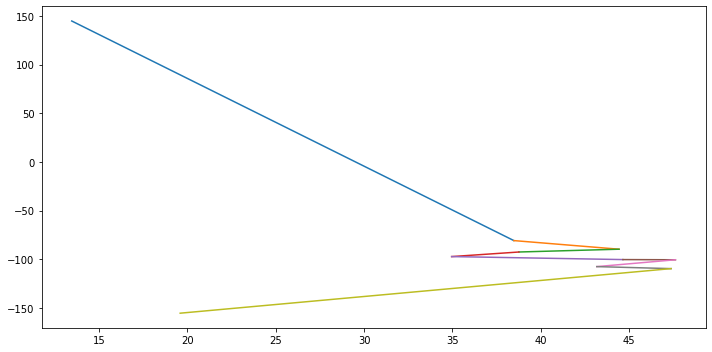

In [9]:
plt.figure(figsize=(10, 5));

plot_route(X, optimal_path)

plt.tight_layout();